In [1]:
import sys

In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
import os
os.getcwd()

'/Volumes/groups/tanaka/People/current/jiwang/projects/heart_regeneration/scripts'

In [45]:
input_Dir = "../results/sc_multiome_R13591_intron.exon.20220729/CM_trajectory_test/"
data_version = 'CM_subtypes_uninjurySubtypes_timepoints.all_downsample'

In [46]:
data_seuratObj = os.path.join(input_Dir, 
                              "RNAmatrix_umap_kalisto.velocity_spliced_unspliced_" + str(data_version) + ".h5ad")

outDir = input_Dir + str(data_version)
if not os.path.exists(outDir):
   os.makedirs(outDir)


In [47]:
sc.settings.figdir = outDir + '/'
scv.settings.figdir = outDir + '/'

In [48]:
adata = sc.read_h5ad(data_seuratObj, chunk_size=6000)

In [49]:
adata

AnnData object with n_obs × n_vars = 3915 × 16819
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'cell_bc', 'condition', 'gex_barcode', 'atac_barcode', 'is_cell', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'pct_reads_in_peaks', 'pct_usable_fragments', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd_RNA', 'iscell_ed_RNA', 'condition_RNA', 'percent.mt_RNA', 'RNA_snn_res.0.7_RNA', 'seurat_clusters_RNA', 'RNA_snn_res.0.5_RNA', 'subtypes_RNA', 'high.tss', 'subtypes', 'celltypes', 'thegraph_res.1', 'seurat_clusters', 'time', 'cell.ids', 'RNA_snn_res.0.3', 'clusters', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.s

In [50]:
outDir

'../results/sc_multiome_R13591_intron.exon.20220729/CM_trajectory_test/CM_subtypes_uninjurySubtypes_timepoints.all_downsample'

In [51]:
adata.layers.keys()

KeysView(Layers with keys: spliced, unspliced)

In [52]:
adata.obs['condition']= adata.obs['condition'].astype('category') # change the condition into category type
adata.obs['celltypes']= adata.obs['celltypes'].astype('category')
adata.obs['seurat_clusters']= adata.obs['seurat_clusters'].astype('category')

In [53]:
adata.obs['condition']

AAACATGCAGCACCAT-1_1_1     Amex_d0
AAACCGGCACAATGTT-1_1_1     Amex_d0
AAACGGATCTGCAAGT-1_1_1     Amex_d0
AAAGCAAGTACCGTAA-1_1_1     Amex_d0
AAAGCAAGTTAGAGCC-1_1_1     Amex_d0
                            ...   
TTTGTCTAGGACCGCT-1        Amex_d14
TTTGTGGCACCGTTCC-1        Amex_d14
TTTGTGGCATCATGTG-1        Amex_d14
TTTGTGTTCATGGCTG-1        Amex_d14
TTTGTTGGTCTAGCTT-1        Amex_d14
Name: condition, Length: 3915, dtype: category
Categories (5, object): ['Amex_d0', 'Amex_d1', 'Amex_d14', 'Amex_d4', 'Amex_d7']

In [54]:
adata.obs['celltypes']

AAACATGCAGCACCAT-1_1_1    CM_ven_(Robo2)
AAACCGGCACAATGTT-1_1_1         CM_Prol_3
AAACGGATCTGCAAGT-1_1_1    CM_ven_(Robo2)
AAAGCAAGTACCGTAA-1_1_1    CM_ven_(Robo2)
AAAGCAAGTTAGAGCC-1_1_1    CM_ven_(Robo2)
                               ...      
TTTGTCTAGGACCGCT-1             CM_Prol_1
TTTGTGGCACCGTTCC-1        CM_ven_(Robo2)
TTTGTGGCATCATGTG-1             CM_Prol_1
TTTGTGTTCATGGCTG-1        CM_ven_(Robo2)
TTTGTTGGTCTAGCTT-1        CM_ven_(Robo2)
Name: celltypes, Length: 3915, dtype: category
Categories (3, object): ['CM_Prol_1', 'CM_Prol_3', 'CM_ven_(Robo2)']

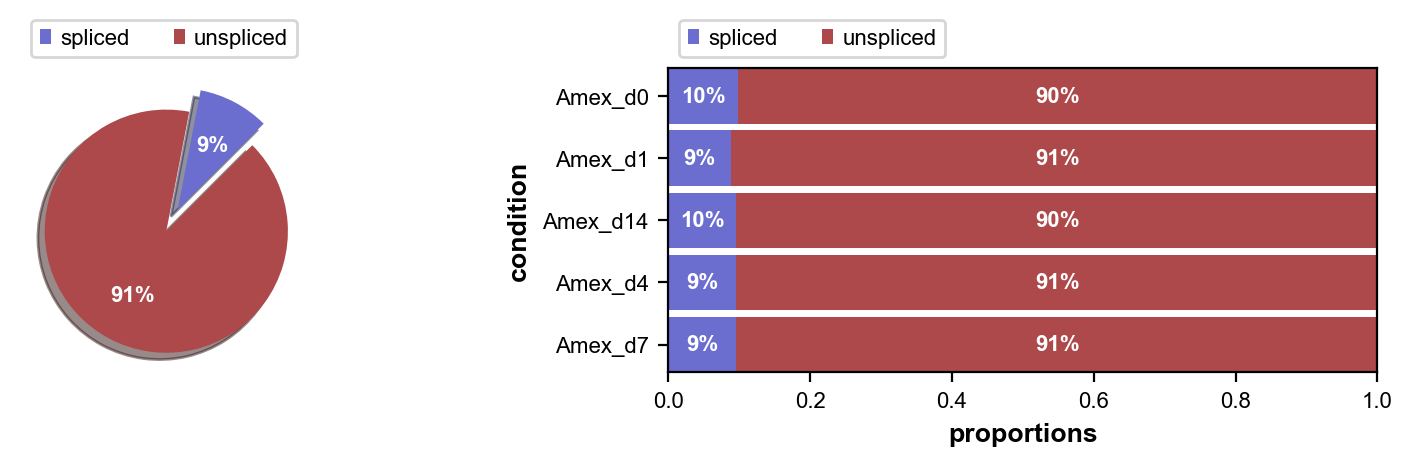

In [55]:
#adata = cr.datasets.pancreas()
scv.pl.proportions(adata, groupby='condition')

In [56]:
scv.pp.filter_and_normalize(adata, 
                            min_shared_counts=20, n_top_genes=1000, 
                            flavor = 'seurat', 
                            layers_normalize={'X', 'spliced', 'unspliced'}) # by specifying layers_normalize to renormalize the counts 

Filtered out 9946 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.


In [57]:
#this below line is important!! no old umaps and pcas
# scv.pp.log1p(adata)

#sc.tl.pca(adata, svd_solver='arpack')
#sc.pl.pca_variance_ratio(adata, log=True)
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
#sc.tl.paga(adata,  groups = 'condition')
#sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(adata, init_pos='paga')
#sc.pl.umap(adata, frameon=False, legend_loc='on data', title='', save='a10222_celltypes_ok.pdf')

In [58]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=50)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

#sc.tl.pca(adata)
#sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
#scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [59]:
scv.tl.recover_dynamics(adata, n_jobs=10, max_iter=10) # slow step and require high memory ~120G, so it is better to start the jupterlab with 150G RAM (~15-20mins)

recovering dynamics (using 10/10 cores)
    finished (0:00:25) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [60]:
adata 

AnnData object with n_obs × n_vars = 3915 × 1000
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'cell_bc', 'condition', 'gex_barcode', 'atac_barcode', 'is_cell', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'pct_reads_in_peaks', 'pct_usable_fragments', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd_RNA', 'iscell_ed_RNA', 'condition_RNA', 'percent.mt_RNA', 'RNA_snn_res.0.7_RNA', 'seurat_clusters_RNA', 'RNA_snn_res.0.5_RNA', 'subtypes_RNA', 'high.tss', 'subtypes', 'celltypes', 'thegraph_res.1', 'seurat_clusters', 'time', 'cell.ids', 'RNA_snn_res.0.3', 'clusters', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'


In [61]:
# save the velocity result
# adata.write(os.path.join(outDir, 'my_results_velocity_recover_dynamics.h5ad'), compression="gzip")

In [62]:
# reload the calculated velocity from tl.recover_dynamics
# adata = sc.read_h5ad(os.path.join(outDir,'my_results_velocity_recover_dynamics.h5ad'), chunk_size=6000)

In [63]:
scv.tl.velocity(adata, mode="dynamical")

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [64]:
scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

computing velocity graph (using 1/10 cores)
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [65]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "seurat_clusters"
)

In [66]:
sc.tl.diffmap(adata, n_comps = 30)

In [67]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['celltypes']  == 'CM_ven_(Robo2)')[0]
sc.tl.dpt(adata, n_branchings = 1, n_dcs=10)

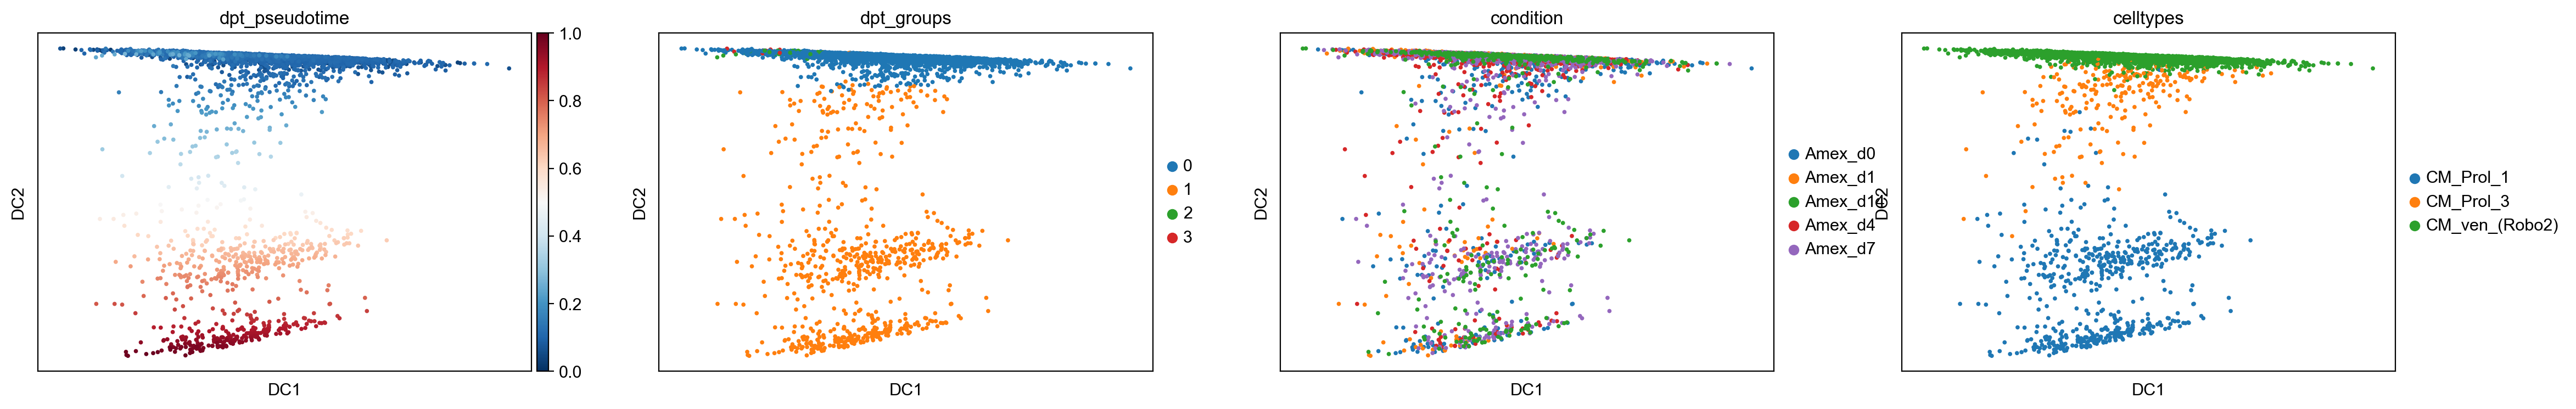

In [68]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'condition', 'celltypes'])

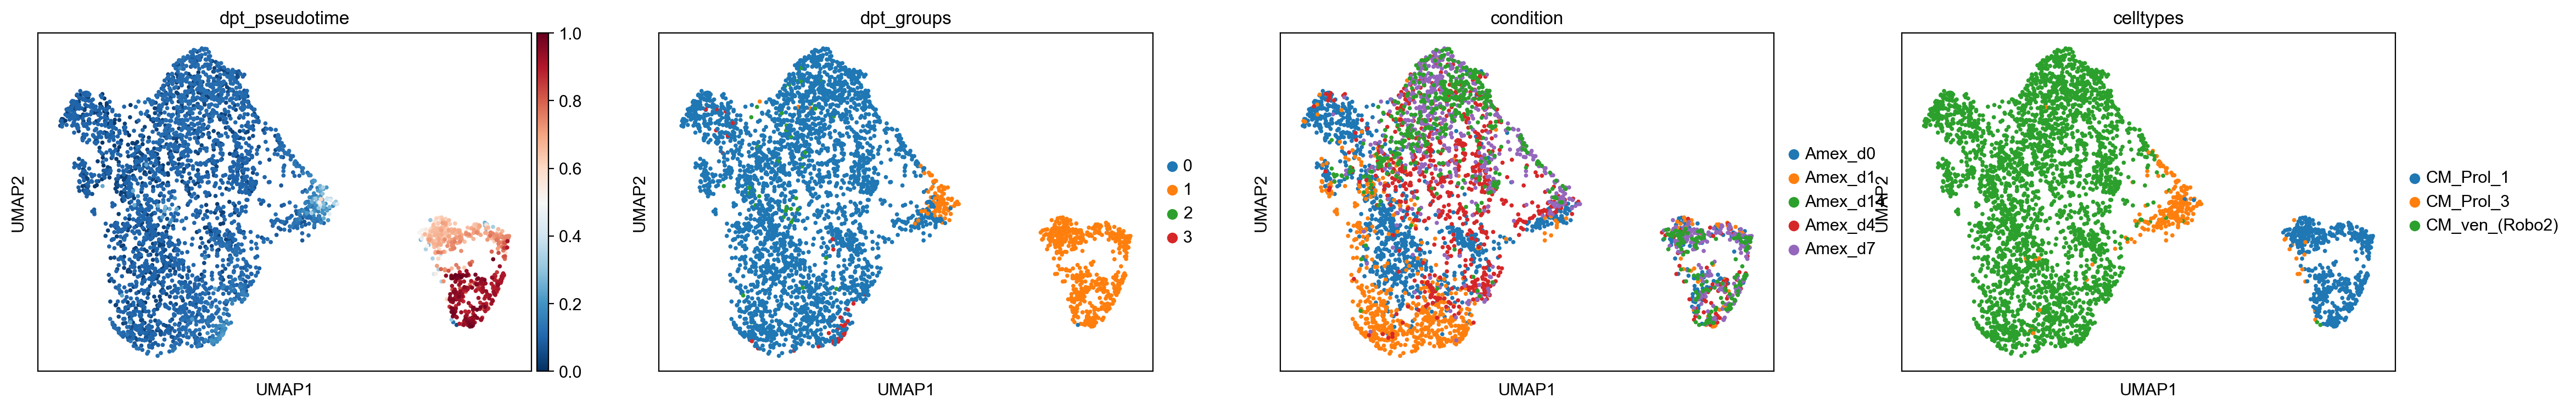

In [69]:
sc.pl.umap(adata, color=['dpt_pseudotime', 'dpt_groups', 'condition', 'celltypes'])

In [70]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "dpt_pseudotime",
    dpi = 120,
    save=os.path.join(outDir, "scvelo_dpt_pseudotime.pdf")
)

saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/CM_trajectory_test/CM_subtypes_uninjurySubtypes_timepoints.all_downsample/scvelo_dpt_pseudotime.pdf


In [71]:
adata.write(os.path.join(outDir, "scanpy_dpt_pseudotime.h5ad"))

In [72]:
adata

AnnData object with n_obs × n_vars = 3915 × 1000
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'cell_bc', 'condition', 'gex_barcode', 'atac_barcode', 'is_cell', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'pct_reads_in_peaks', 'pct_usable_fragments', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd_RNA', 'iscell_ed_RNA', 'condition_RNA', 'percent.mt_RNA', 'RNA_snn_res.0.7_RNA', 'seurat_clusters_RNA', 'RNA_snn_res.0.5_RNA', 'subtypes_RNA', 'high.tss', 'subtypes', 'celltypes', 'thegraph_res.1', 'seurat_clusters', 'time', 'cell.ids', 'RNA_snn_res.0.3', 'clusters', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts',

In [73]:
adata.obs['dpt_pseudotime']

AAACATGCAGCACCAT-1_1_1    0.000000
AAACCGGCACAATGTT-1_1_1    0.126893
AAACGGATCTGCAAGT-1_1_1    0.094774
AAAGCAAGTACCGTAA-1_1_1    0.012378
AAAGCAAGTTAGAGCC-1_1_1    0.026000
                            ...   
TTTGTCTAGGACCGCT-1        0.855744
TTTGTGGCACCGTTCC-1        0.104639
TTTGTGGCATCATGTG-1        0.861300
TTTGTGTTCATGGCTG-1        0.110065
TTTGTTGGTCTAGCTT-1        0.118744
Name: dpt_pseudotime, Length: 3915, dtype: float32

In [74]:
adata.obs['dpt_pseudotime'].to_csv(os.path.join(outDir, "scanpy_dpt_pseudotime.csv"))

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "condition", 
    save=os.path.join(outDir, "RNAvelocity_stream_model_dynamical_stream_top2000.pdf"))

In [ ]:
#scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity(adata, mode="steady_state")

In [ ]:
scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "condition", 
    save=os.path.join(outDir, "RNAvelocity_stream_model_steadystat_stream_top2000.pdf"))

In [ ]:
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "condition", 
    save=os.path.join(outDir, "RNAvelocity_model_stochastic_stream_top2000.pdf"))

In [ ]:
# compare three models and it seems that the steady state works relatively better for root and terminal cells

In [ ]:
scv.tl.velocity(adata, mode="dynamical") # test dynamical model
#scv.tl.velocity(adata, mode="steady_state")
#scv.tl.velocity(adata, mode="stochastic") # test dynamical model
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.4, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.1, min_mass=1,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
adata

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="pca", smooth=0.2, min_mass=0.5,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
print(adata.var.velocity_genes.sum()) # check the genes used for RNA velocity

In [ ]:
## top genes
top_genes = adata.var.sort_values('fit_likelihood', ascending=False).index[:20]
scv.pl.scatter(adata, basis=top_genes, color="condition", wspace=1, hspace=1, nrows=4, ncols=5)

In [ ]:
# scv.pl.velocity_embedding(adata, basis="umap", arrow_length=3, arrow_size=2, dpi=120, color = "condition")
# scv.pl.velocity_embedding(adata, basis='umap',color='cell.type.fine',arrow_length=5)
# scv.pl.velocity_embedding_grid(adata, basis='umap',color='seurat_clusters',arrow_length=5)

In [ ]:
#####latent time
#scv.tl.terminal_states(adata)
#scv.tl.latent_time(adata)
#scv.pl.scatter(adata, color='latent_time',color_map='gnuplot', size=80)
#scv.pl.scatter(adata, color=[ 'root_cells', 'end_points'])

In [ ]:
# save the scvelo result
adata
adata.write(os.path.join(outDir,'my_results_scvelo_stochastic.h5ad'), compression="gzip")

In [ ]:
################# 
# Run CellRank using kernel functions -- https://cellrank.readthedocs.io/en/stable/kernels_and_estimators.html
# 
#################

In [ ]:
adata = sc.read_h5ad(os.path.join(outDir,'my_results_scvelo_stochastic.h5ad'), chunk_size=6000)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "clusters"
)

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == '0')[0]
sc.tl.dpt(adata, n_branchings = 2)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "dpt_pseudotime",
    dpi = 120,
    save=os.path.join(outDir, "scvelo_dpt_pseudotime.pdf")
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.4, min_mass=1,
    legend_fontsize=12, title="", color = "condition",
    dpi = 120, 
    save=os.path.join(outDir, "scvelo_condition.pdf")
)

In [ ]:
scv.pl.scatter(adata, basis="umap", c="condition",
                dpi = 120, 
                save=os.path.join(outDir, "scatter_condition.pdf")
              )

In [ ]:
from cellrank.tl.kernels import VelocityKernel
vk = VelocityKernel(adata)
pk = cr.tl.kernels.PseudotimeKernel(adata)

In [ ]:
# Compute a transition matrix
pk.compute_transition_matrix()
vk.compute_transition_matrix()

In [ ]:
# Combining multiple kernels
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()

In [ ]:
combined_kernel = 0.5 * vk + 0.3 *pk + 0.2 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck

In [ ]:
# Initialize an estimator
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

In [ ]:
# Compute a matrix decomposition
g.compute_schur(n_components=6) # method with 'brandts', otherwise kernel will be killed; take really a long time for 40k cells 
g.plot_spectrum()

In [ ]:
# Infer terminal states
g.compute_macrostates(n_states = 8, cluster_key="clusters")
g.plot_macrostates()

In [ ]:
g.plot_macrostates(same_plot=False, discrete=True)

In [ ]:
g.set_terminal_states({"Neurons": adata[adata.obs["clusters"] == "8"].obs_names}, add_to_existing=False)
g.set_terminal_states({"FP": adata[adata.obs["clusters"] == "5"].obs_names}, add_to_existing=True)

In [ ]:
g.compute_absorption_probabilities()

In [ ]:
g.plot_absorption_probabilities(discrete = True, 
                                same_plot = False, 
                                save=os.path.join(outDir, "cellrank_absorption_probs_vk0.5_pk0.3_ck0.2.pdf"))

In [ ]:
fp_drivers = g.compute_lineage_drivers(lineages="FP", return_drivers=True)
fp_drivers.sort_values(by="FP_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("FP", n_genes=50,
                      #save=os.path.join(outDir, "cellrank_FP_drivers.pdf")
                       save = 'cellrank_fp_drivers.pdf'
                      )

In [ ]:
nr_drivers = g.compute_lineage_drivers(lineages="Neurons", return_drivers=True)
nr_drivers.sort_values(by="Neurons_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("Neurons", n_genes=50,
                       #save=os.path.join(outDir, "cellrank_Neurons_drivers.pdf")
                       save = 'cellrank_np_drivers.pdf'
                      )


In [ ]:
fp_drivers.to_csv(os.path.join(outDir,'res_fp_drivers.csv'))
nr_drivers.to_csv(os.path.join(outDir,'res_neuron_drivers.csv'))

In [ ]:
################# 
# Run CellRank using basic functions -- https://cellrank.readthedocs.io/en/stable/cellrank_basics.html
#################

In [ ]:
adata
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "clusters"
)

In [ ]:
# Identify terminal states
# it did not work well, see issue in https://github.com/theislab/cellrank/issues/399
cr.tl.terminal_states(adata, 
                      n_states = 2, 
                      cluster_key="clusters", 
                      weight_connectivities=0.2, 
                      force_recompute = True)

In [ ]:
cr.pl.terminal_states(adata)

In [ ]:
# Identify initial states
cr.tl.initial_states(adata, 
                     n_states = 1, 
                     cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

In [ ]:
# Compute fate maps
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [ ]:
cr.pl.lineages(adata, same_plot=False, 
              save=os.path.join(input_Dir, "CellRank_fatemap_stochasticModel.pdf"))

In [ ]:
cr.pl.log_odds(
    adata,
    lineage_1="5",
    lineage_2="10",
    time_key="time",
    keys=["condition"],
    threshold=0,
    size=2,
    xticks_step_size=4,
    figsize=(9, 4),
)

In [ ]:
### Directed PAGA not used 

In [ ]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

In [ ]:
scv.tl.paga(
    adata,
    groups="condition",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)


In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="condition",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_condition_umapV3.pdf")
)


In [ ]:
scv.tl.paga(
    adata,
    groups="clusters",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="clusters",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_clusters_umapV3.pdf"),
)
